## Titanic Dataset Analysis and Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

print("All libraries imported successfully.")


All libraries imported successfully.


In [271]:
df=pd.read_csv('train.csv')

In [273]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [275]:
print(str(len(df.index)))

891


### Analyzing Data

<Axes: xlabel='Survived', ylabel='count'>

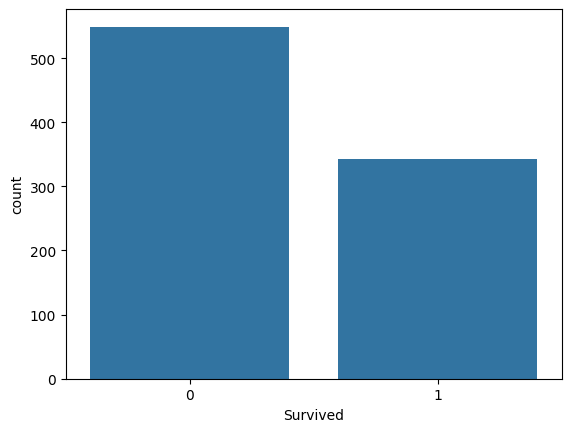

In [278]:
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

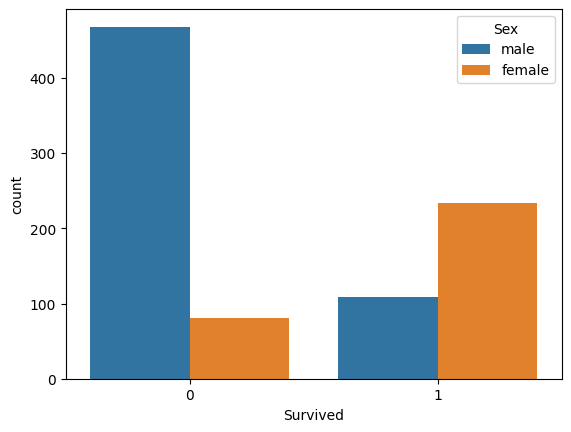

In [280]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

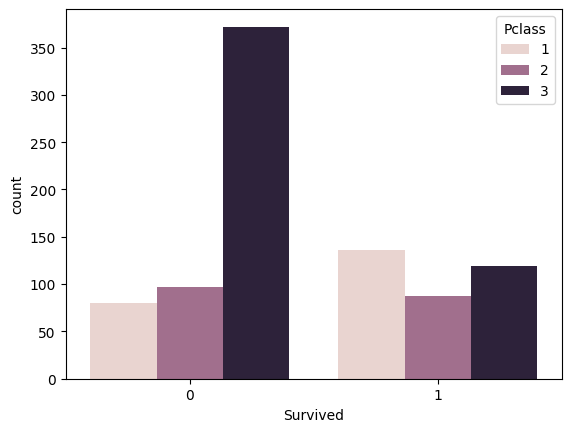

In [282]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: xlabel='Age', ylabel='Count'>

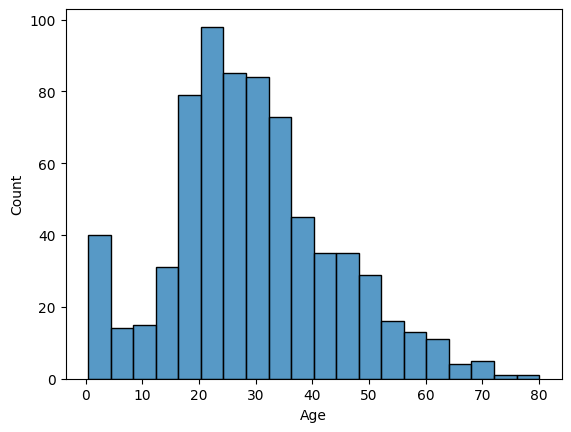

In [284]:
sns.histplot(x="Age",data=df)

<Axes: xlabel='Fare', ylabel='Count'>

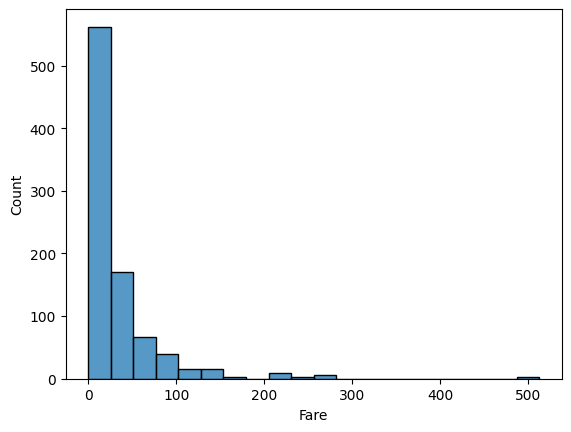

In [286]:
sns.histplot(x="Fare", data=df, bins=20)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Wrangling

In [291]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [293]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

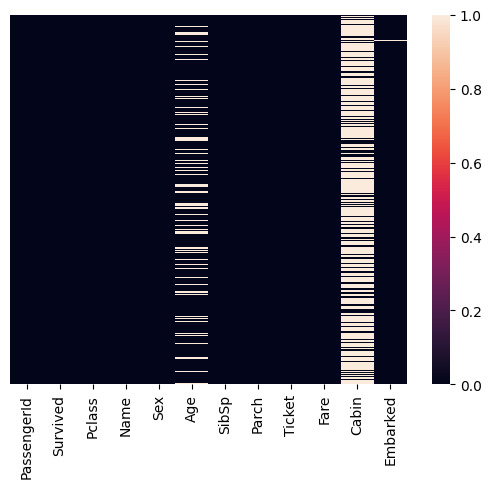

In [295]:
sns.heatmap(df.isnull(), yticklabels=False)

In [297]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
df.drop("Cabin", axis=1, inplace=True)

In [301]:
df.dropna(inplace=True)

<Axes: >

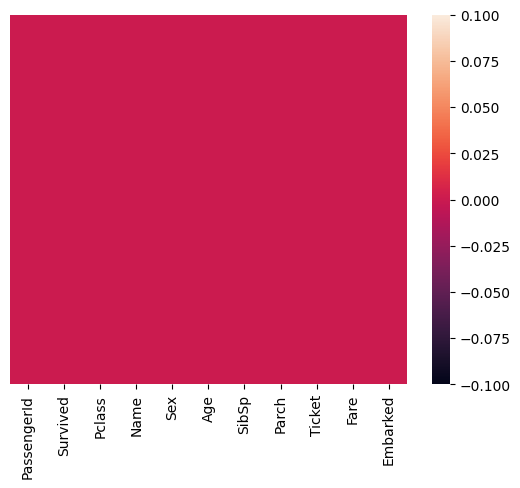

In [303]:
sns.heatmap(df.isnull(), yticklabels=False)

In [305]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [307]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [309]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [311]:
df=pd.concat([df,sex,embark,pcl], axis=1)
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [313]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [315]:
df.drop(['Sex','PassengerId','Name','Pclass','Ticket','Embarked'],axis=1,inplace=True)

In [334]:
df.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Train Data

In [337]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [339]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [343]:
from sklearn.linear_model import LogisticRegression

In [345]:
logmodel = LogisticRegression()

In [351]:
X_train.columns = X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)
logmodel.fit(X_train, y_train)

C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [353]:
print(X_train.columns)
print(X_test.columns)


Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')


In [359]:
predictions=logmodel.predict(X_test)

In [361]:
from sklearn.metrics import classification_report

In [363]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.83       139\n           1       0.75      0.73      0.74        96\n\n    accuracy                           0.79       235\n   macro avg       0.78      0.78      0.78       235\nweighted avg       0.79      0.79      0.79       235\n'

In [369]:
from sklearn.metrics import confusion_matrix

In [373]:
confusion_matrix(y_test,predictions)

array([[116,  23],
       [ 26,  70]], dtype=int64)